In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd 
import requests
import datetime
import matplotlib.pyplot as plt
# import plotly.graph_objects as go
import plotly.offline as py
import plotly
from plotly.offline import init_notebook_mode
from plotly import graph_objs as go
plotly.offline.init_notebook_mode(connected=True)
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import pywt

In [2]:
# wavefun(level=5) é o parâmetro para o nível de refinamento baseado nos "filter coefficients"
# referência: https://pywavelets.readthedocs.io/en/latest/regression/wavelet.html#and-now-the-wavefun
# escolhi 5 para uma boa visualização do gráfico

[phi, psi, x] = pywt.Wavelet('db8').wavefun(level=5)

data = [go.Scatter(x=x, y=psi, mode='lines', name="Daubechies 4 psi")]
data += [go.Scatter(x=x, y=phi, mode='lines', name="Daubechies 4 phi")]

[phi, psi, x] = pywt.Wavelet('db8').wavefun(level=4)

data += [go.Scatter(x=x, y=psi, mode='lines', name="Daubechies 8 psi")]
data += [go.Scatter(x=x, y=phi, mode='lines', name="Daubechies 8 phi")]

layout = go.Layout(
    title='Wavelets',
    xaxis={'title':'x'},
    yaxis={'title':'y'}
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

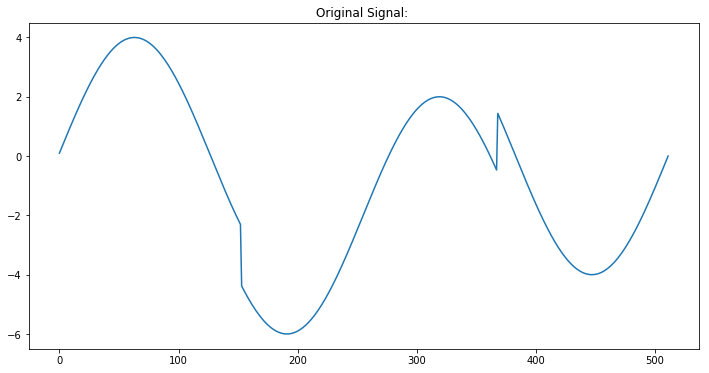

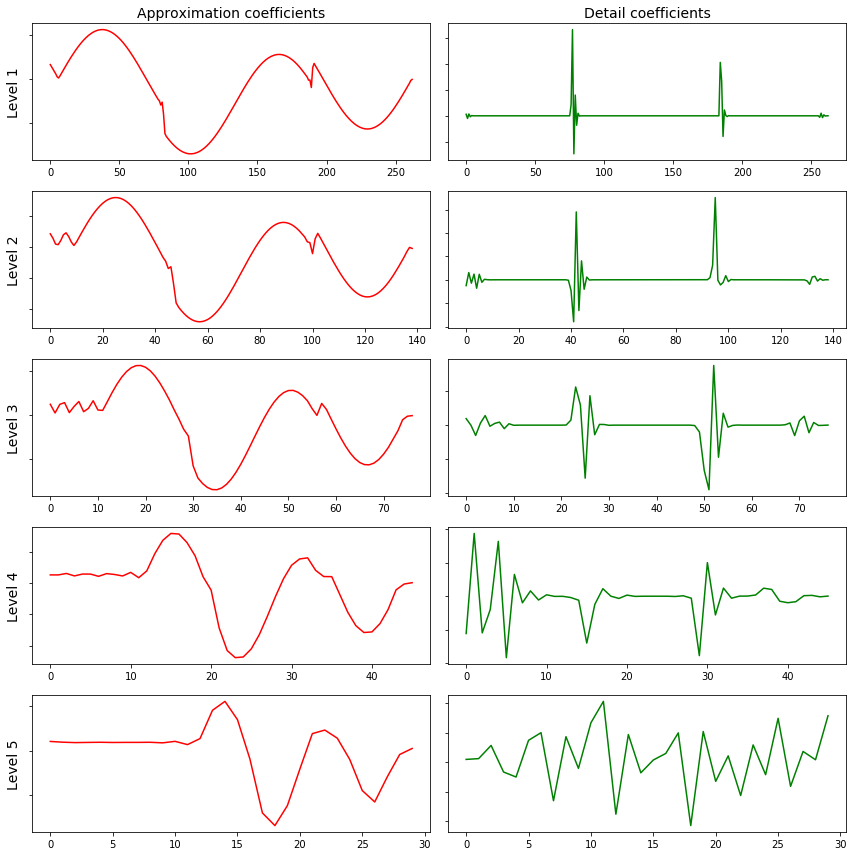

In [4]:
heavisine = pywt.data.demo_signal(name='HeaviSine', n=512)

import pywt

signal = heavisine
    
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title("Original Signal: ")
ax.plot(signal)
plt.show()
    
data = signal
waveletname = 'db8'
 
fig, axarr = plt.subplots(nrows=5, ncols=2, figsize=(12,12))
for ii in range(5):
    (data, coeff_d) = pywt.dwt(data, waveletname)
    axarr[ii, 0].plot(data, 'r')
    axarr[ii, 1].plot(coeff_d, 'g')
    axarr[ii, 0].set_ylabel("Level {}".format(ii + 1), fontsize=14, rotation=90)
    axarr[ii, 0].set_yticklabels([])
    if ii == 0:
        axarr[ii, 0].set_title("Approximation coefficients", fontsize=14)
        axarr[ii, 1].set_title("Detail coefficients", fontsize=14)
    axarr[ii, 1].set_yticklabels([])
plt.tight_layout()
plt.show()